In [34]:
import os
from google.cloud import bigquery
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np

# Set the environment variable for authentication
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:\\Users\\cihat\\Downloads\\new-one-420600-8e7e0e7eead4.json"

In [3]:
# Initialize a BigQuery client
client = bigquery.Client()

# Define your query
query = """
    SELECT *
    FROM `new-one-420600.trying_gcp.data_analyst_jobs`
"""

# Run the query
query_job = client.query(query)  # API request

# Process the results
results = query_job.result().to_dataframe()

In [3]:
filtered_first = results[(results['job_work_from_home'] == True) & (results['job_health_insurance'] == True) & (results['salary_year_avg'].notna())].sort_values(by='salary_year_avg', ascending=False)

unique_locations = filtered_first['search_location'].unique()

df = pd.DataFrame(unique_locations)

df

,0
0,"California, United States"
1,"New York, United States"
2,"Illinois, United States"
3,Georgia
4,"Florida, United States"
5,"Texas, United States"
6,Sudan
7,Sweden


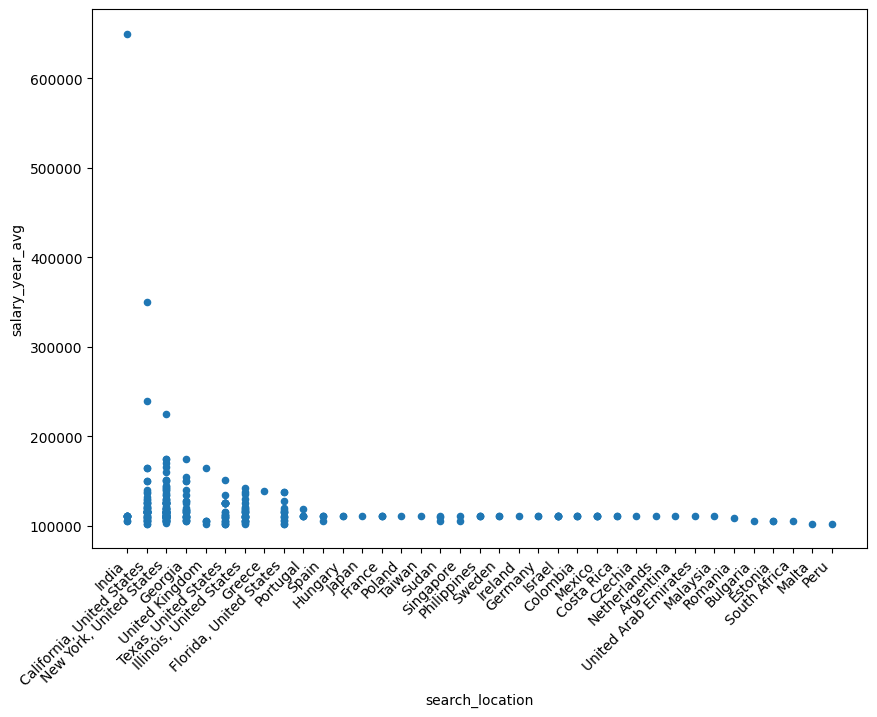

In [22]:
filtered_result_1 = results[results['salary_year_avg'].notna()].copy()

filtered_result_1.loc[:, 'salary_hour_avg'] = filtered_result_1['salary_year_avg'] / 2080

filtered_result_1.sort_values(by=['salary_year_avg', 'salary_hour_avg'], ascending=False, inplace=True)


ax = filtered_result_1.head(300).plot(x='search_location', y='salary_year_avg', kind='scatter', figsize=(10, 7))


ax.set_xticks(range(len(ax.get_xticklabels())))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


plt.show()


In [7]:
from pandas_gbq import to_gbq

project_id = 'new-one-420600'
dataset_id = 'trying_gcp'
table_name = 'data_analyst_jobs_new'


# Define the full table name in the format dataset_id.table_id
table_id = f'{dataset_id}.{table_name}'

# Upload the DataFrame to BigQuery
to_gbq(filtered_result_1, table_id, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<?, ?it/s]


In [6]:
filtered_result_1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
25122,Data Analyst,Data Analyst,Anywhere,via Y Combinator,Full-time,True,India,2023-02-20 15:13:44+00:00,True,False,India,year,650000.0,225.694444,Mantys,None,None
37381,Data Analyst,Data Analyst,"San Francisco, CA",via Ladders,Full-time,False,"California, United States",2023-06-22 07:00:59+00:00,True,True,United States,year,350000.0,121.527778,Anthropic,"['python', 'sql']","{'programming': ['python', 'sql']}"
17525,Data Analyst,Data Analyst,"San Francisco, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-06-21 13:00:59+00:00,False,True,United States,year,240000.0,83.333333,Anthropic,"['python', 'sql']","{'programming': ['python', 'sql']}"
8113,Data Analyst,Data Analyst,"Fairfax, VA",via Ladders,Full-time,False,"New York, United States",2023-02-23 07:00:28+00:00,False,False,United States,year,225000.0,78.125000,GovCIO,None,None
8955,Data Analyst,Data Analyst,"Bethesda, MD",via Ladders,Full-time,False,"New York, United States",2023-01-16 09:16:20+00:00,False,False,United States,year,175000.0,60.763889,Xator Corp,"['sql', 'r', 'python', 'excel', 'tableau', 'ms...","{'analyst_tools': ['excel', 'tableau', 'ms acc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34909,Data Analyst,Data Analyst,"Gainesville, FL",via ZipRecruiter,Full-time,False,Georgia,2023-11-11 09:18:50+00:00,True,True,United States,year,35000.0,12.152778,United Energy Solar,"['sheets', 'excel']","{'analyst_tools': ['sheets', 'excel']}"
34914,Data Analyst,Data Analyst,"Gainesville, FL",via Indeed,Full-time,False,Georgia,2023-03-22 05:01:33+00:00,True,True,United States,year,35000.0,12.152778,United Energy Solar,"['sheets', 'excel']","{'analyst_tools': ['sheets', 'excel']}"
34915,Data Analyst,Data Analyst,"Gainesville, FL",via Adzuna,Full-time,False,Georgia,2023-08-18 12:43:01+00:00,True,True,United States,year,35000.0,12.152778,United Energy Solar,"['sheets', 'excel']","{'analyst_tools': ['sheets', 'excel']}"
34917,Data Analyst,Data Analyst,"Gainesville, FL",via Indeed,Full-time,False,"Florida, United States",2023-05-30 21:01:55+00:00,True,True,United States,year,35000.0,12.152778,United Energy Solar,"['sheets', 'excel']","{'analyst_tools': ['sheets', 'excel']}"


In [5]:
results

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-11-03 13:56:52+00:00,False,False,United States,None,NaN,NaN,Brooksource,['sql'],{'programming': ['sql']}
1,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-01-23 14:24:54+00:00,False,False,United States,None,NaN,NaN,Apex Systems,"['sql', 'sas', 'sas', 'excel', 'powerpoint']","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
2,Data Analyst,Data Analyst,None,via LinkedIn,Full-time,False,"New York, United States",2023-05-17 12:59:56+00:00,False,False,United States,None,NaN,NaN,PRI Technology,"['sql', 'sql server', 'snowflake', 'airflow', ...","{'analyst_tools': ['power bi', 'tableau'], 'cl..."
3,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-02-08 16:56:53+00:00,False,True,United States,hour,NaN,25.5,CRG,"['excel', 'sap', 'outlook']","{'analyst_tools': ['excel', 'sap', 'outlook']}"
4,Data Analyst,Data Analyst,None,via LinkedIn,Full-time,False,"New York, United States",2023-09-18 08:00:29+00:00,False,False,United States,None,NaN,NaN,Tourism Economics,"['python', 'r', 'sql', 'tableau', 'excel', 'sy...","{'analyst_tools': ['tableau', 'excel'], 'progr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41945,Data Analyst,Data Analyst,"San Benedetto del Tronto, Province of Ascoli P...",via Trabajo. Org,Full-time,False,Italy,2023-10-06 00:12:28+00:00,True,False,Italy,None,NaN,NaN,IN OPERA SPA,['gdpr'],{'libraries': ['gdpr']}
41946,Data Analyst,Data Analyst,"Reggio Calabria, Metropolitan City of Reggio C...",via Trabajo. Org,Full-time,False,Italy,2023-08-17 07:16:02+00:00,True,False,Italy,None,NaN,NaN,Classgap,None,None
41947,Data Analyst,Data Analyst,"Samut Sakhon, Mueang Samut Sakhon District, Sa...",via JobThai,Full-time,False,Thailand,2023-05-08 10:29:36+00:00,True,False,Thailand,None,NaN,NaN,บริษัท รัชดาศูนย์รวมวัสดุ จำกัด,None,None
41948,Data Analyst,Data Analyst,"Yogyakarta, Yogyakarta City, Special Region of...",via Recruit.net,Full-time,False,Indonesia,2023-03-03 00:25:24+00:00,True,False,Indonesia,None,NaN,NaN,Jala Tech,"['sql', 'matlab', 'r', 'sas', 'sas', 'python',...","{'analyst_tools': ['sas'], 'cloud': ['aws'], '..."


In [25]:
entries = results.groupby('search_location').size()

df1 = pd.DataFrame(entries, columns=['count'])

df1_sorted = df1.sort_values(by='count', ascending=False)

df1_sorted.head(20)

,count
search_location,
"New York, United States",3964
United Kingdom,3377
"California, United States",2438
"Illinois, United States",2297
"Texas, United States",2122
Georgia,1815
Singapore,1732
India,1539
"Florida, United States",1450


In [33]:
entries = results.groupby('search_location')['salary_year_avg'].agg(['min', 'mean', 'max'])

entries_sorted = entries.sort_values(by='mean', ascending=False)

entries_last = entries_sorted[entries_sorted['mean'].notna()]

entries_last

,min,mean,max
search_location,,,
India,57500.0,137828.466667,650000.0
Czechia,111175.0,111175.000000,111175.0
Malaysia,111175.0,111175.000000,111175.0
Japan,111175.0,111175.000000,111175.0
Portugal,102500.0,110973.333333,118640.0
Romania,109120.0,109120.000000,109120.0
Greece,98500.0,109000.000000,138500.0
Germany,102500.0,108283.333333,111175.0
Hungary,98500.0,105344.250000,111202.0


In [8]:
results

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-11-03 13:56:52+00:00,False,False,United States,None,NaN,NaN,Brooksource,['sql'],{'programming': ['sql']}
1,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-01-23 14:24:54+00:00,False,False,United States,None,NaN,NaN,Apex Systems,"['sql', 'sas', 'sas', 'excel', 'powerpoint']","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
2,Data Analyst,Data Analyst,None,via LinkedIn,Full-time,False,"New York, United States",2023-05-17 12:59:56+00:00,False,False,United States,None,NaN,NaN,PRI Technology,"['sql', 'sql server', 'snowflake', 'airflow', ...","{'analyst_tools': ['power bi', 'tableau'], 'cl..."
3,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-02-08 16:56:53+00:00,False,True,United States,hour,NaN,25.5,CRG,"['excel', 'sap', 'outlook']","{'analyst_tools': ['excel', 'sap', 'outlook']}"
4,Data Analyst,Data Analyst,None,via LinkedIn,Full-time,False,"New York, United States",2023-09-18 08:00:29+00:00,False,False,United States,None,NaN,NaN,Tourism Economics,"['python', 'r', 'sql', 'tableau', 'excel', 'sy...","{'analyst_tools': ['tableau', 'excel'], 'progr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41945,Data Analyst,Data Analyst,"San Benedetto del Tronto, Province of Ascoli P...",via Trabajo. Org,Full-time,False,Italy,2023-10-06 00:12:28+00:00,True,False,Italy,None,NaN,NaN,IN OPERA SPA,['gdpr'],{'libraries': ['gdpr']}
41946,Data Analyst,Data Analyst,"Reggio Calabria, Metropolitan City of Reggio C...",via Trabajo. Org,Full-time,False,Italy,2023-08-17 07:16:02+00:00,True,False,Italy,None,NaN,NaN,Classgap,None,None
41947,Data Analyst,Data Analyst,"Samut Sakhon, Mueang Samut Sakhon District, Sa...",via JobThai,Full-time,False,Thailand,2023-05-08 10:29:36+00:00,True,False,Thailand,None,NaN,NaN,บริษัท รัชดาศูนย์รวมวัสดุ จำกัด,None,None
41948,Data Analyst,Data Analyst,"Yogyakarta, Yogyakarta City, Special Region of...",via Recruit.net,Full-time,False,Indonesia,2023-03-03 00:25:24+00:00,True,False,Indonesia,None,NaN,NaN,Jala Tech,"['sql', 'matlab', 'r', 'sas', 'sas', 'python',...","{'analyst_tools': ['sas'], 'cloud': ['aws'], '..."


In [21]:
year_column = results.copy()

year_column['year'] = year_column['job_posted_date'].dt.year
year_column['month'] = year_column['job_posted_date'].dt.month

year_month_filtered = year_column.groupby(['year', 'month']).size()

year_month_filtered = pd.DataFrame(year_month_filtered, columns=['count'])

year_month_filtered

count
year month       
2023 1       4978
     2       3410
     3       3369
     4       3258
     5       3017
     6       3369
     7       3194
     8       4116
     9       3218
     10      3500
     11      3333
     12      3188

In [4]:
results

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-11-03 13:56:52+00:00,False,False,United States,None,NaN,NaN,Brooksource,['sql'],{'programming': ['sql']}
1,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-01-23 14:24:54+00:00,False,False,United States,None,NaN,NaN,Apex Systems,"['sql', 'sas', 'sas', 'excel', 'powerpoint']","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
2,Data Analyst,Data Analyst,None,via LinkedIn,Full-time,False,"New York, United States",2023-05-17 12:59:56+00:00,False,False,United States,None,NaN,NaN,PRI Technology,"['sql', 'sql server', 'snowflake', 'airflow', ...","{'analyst_tools': ['power bi', 'tableau'], 'cl..."
3,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-02-08 16:56:53+00:00,False,True,United States,hour,NaN,25.5,CRG,"['excel', 'sap', 'outlook']","{'analyst_tools': ['excel', 'sap', 'outlook']}"
4,Data Analyst,Data Analyst,None,via LinkedIn,Full-time,False,"New York, United States",2023-09-18 08:00:29+00:00,False,False,United States,None,NaN,NaN,Tourism Economics,"['python', 'r', 'sql', 'tableau', 'excel', 'sy...","{'analyst_tools': ['tableau', 'excel'], 'progr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41945,Data Analyst,Data Analyst,"San Benedetto del Tronto, Province of Ascoli P...",via Trabajo. Org,Full-time,False,Italy,2023-10-06 00:12:28+00:00,True,False,Italy,None,NaN,NaN,IN OPERA SPA,['gdpr'],{'libraries': ['gdpr']}
41946,Data Analyst,Data Analyst,"Reggio Calabria, Metropolitan City of Reggio C...",via Trabajo. Org,Full-time,False,Italy,2023-08-17 07:16:02+00:00,True,False,Italy,None,NaN,NaN,Classgap,None,None
41947,Data Analyst,Data Analyst,"Samut Sakhon, Mueang Samut Sakhon District, Sa...",via JobThai,Full-time,False,Thailand,2023-05-08 10:29:36+00:00,True,False,Thailand,None,NaN,NaN,บริษัท รัชดาศูนย์รวมวัสดุ จำกัด,None,None
41948,Data Analyst,Data Analyst,"Yogyakarta, Yogyakarta City, Special Region of...",via Recruit.net,Full-time,False,Indonesia,2023-03-03 00:25:24+00:00,True,False,Indonesia,None,NaN,NaN,Jala Tech,"['sql', 'matlab', 'r', 'sas', 'sas', 'python',...","{'analyst_tools': ['sas'], 'cloud': ['aws'], '..."


In [29]:
a = results.copy()

a['has_sql'] = a['job_type_skills'].str.contains('sql', case=False, na=False)
a['has_python'] = a['job_type_skills'].str.contains('python', case=False, na=False)
a['has_power_bi'] = a['job_type_skills'].str.contains('power bi', case=False, na=False)

a

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,has_sql,has_python,has_power_bi
0,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-11-03 13:56:52+00:00,False,False,United States,None,NaN,NaN,Brooksource,['sql'],{'programming': ['sql']},True,False,False
1,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-01-23 14:24:54+00:00,False,False,United States,None,NaN,NaN,Apex Systems,"['sql', 'sas', 'sas', 'excel', 'powerpoint']","{'analyst_tools': ['sas', 'excel', 'powerpoint...",True,False,False
2,Data Analyst,Data Analyst,None,via LinkedIn,Full-time,False,"New York, United States",2023-05-17 12:59:56+00:00,False,False,United States,None,NaN,NaN,PRI Technology,"['sql', 'sql server', 'snowflake', 'airflow', ...","{'analyst_tools': ['power bi', 'tableau'], 'cl...",True,False,True
3,Data Analyst,Data Analyst,None,via LinkedIn,Contractor,False,Georgia,2023-02-08 16:56:53+00:00,False,True,United States,hour,NaN,25.5,CRG,"['excel', 'sap', 'outlook']","{'analyst_tools': ['excel', 'sap', 'outlook']}",False,False,False
4,Data Analyst,Data Analyst,None,via LinkedIn,Full-time,False,"New York, United States",2023-09-18 08:00:29+00:00,False,False,United States,None,NaN,NaN,Tourism Economics,"['python', 'r', 'sql', 'tableau', 'excel', 'sy...","{'analyst_tools': ['tableau', 'excel'], 'progr...",True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41945,Data Analyst,Data Analyst,"San Benedetto del Tronto, Province of Ascoli P...",via Trabajo. Org,Full-time,False,Italy,2023-10-06 00:12:28+00:00,True,False,Italy,None,NaN,NaN,IN OPERA SPA,['gdpr'],{'libraries': ['gdpr']},False,False,False
41946,Data Analyst,Data Analyst,"Reggio Calabria, Metropolitan City of Reggio C...",via Trabajo. Org,Full-time,False,Italy,2023-08-17 07:16:02+00:00,True,False,Italy,None,NaN,NaN,Classgap,None,None,False,False,False
41947,Data Analyst,Data Analyst,"Samut Sakhon, Mueang Samut Sakhon District, Sa...",via JobThai,Full-time,False,Thailand,2023-05-08 10:29:36+00:00,True,False,Thailand,None,NaN,NaN,บริษัท รัชดาศูนย์รวมวัสดุ จำกัด,None,None,False,False,False
41948,Data Analyst,Data Analyst,"Yogyakarta, Yogyakarta City, Special Region of...",via Recruit.net,Full-time,False,Indonesia,2023-03-03 00:25:24+00:00,True,False,Indonesia,None,NaN,NaN,Jala Tech,"['sql', 'matlab', 'r', 'sas', 'sas', 'python',...","{'analyst_tools': ['sas'], 'cloud': ['aws'], '...",True,True,False


In [30]:
not_na_columns = a[a['job_type_skills'].notna()]

not_na_columns.shape[0]

35501

In [33]:
sql_columns_count = not_na_columns['has_sql'].sum()
python_columns_count = not_na_columns['has_python'].sum()
power_bi_columns_count = not_na_columns['has_power_bi'].sum()

percentage_sql = (sql_columns_count / not_na_columns.shape[0]) * 100
percentage_python = (python_columns_count / not_na_columns.shape[0]) * 100
percentage_power_bi = (power_bi_columns_count / not_na_columns.shape[0]) * 100

print(percentage_sql)
print(percentage_python)
print(percentage_power_bi)

68.76707698374693
40.03267513591167
28.525957015295344
